## Cometarios iniciais
Base de dados do Kaggle, que possui dados sobre a demissão de funcionarios, e seus diferentes campos, o link da base de dados: https://www.kaggle.com/datasets/colearninglounge/employee-attrition

A label do dataset é o campo **Attritiom**

# Desafio SDC 2024 - 3º Entregável: Modelagem de Machine Learning

Este notebook corresponde ao terceiro entregável do Challenge SDC 2024 para a disciplina de front end & mobile development com a orientação do professor Mario Andre de Deus. Nesta fase, focamos na modelagem de Machine Learning a partir do notebook entregue no segundo sprint, adicionando as seguintes etapas:

1. **Feature Engineering**: Processamento e engenharia de features para melhorar a qualidade dos dados de entrada.
2. **Treinamento de Modelos**: Implementação de algoritmos de machine learning para prever a taxa de atrito (Attrition) dos funcionários.
3. **Validação de Modelos**: Avaliação da performance do modelo utilizando métricas como acurácia, precisão, recall e F1-score.
4. **Tuning de Hiperparâmetros**: Otimização dos hiperparâmetros do modelo para maximizar a performance.

O objetivo final é treinar um modelo que preveja com maior precisão a probabilidade de um funcionário se desligar da empresa, utilizando o dataset fornecido.

Além disso, faremos uma análise comparativa entre os diferentes modelos treinados e suas respectivas performances. O resultado será entregue em um relatório PDF com o link para o repositório no GitHub.


## Importações

### Bibliotecas

In [ ]:
# Importações gerais
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Validação de modelos
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configuração de gráficos
sns.set(style="whitegrid")

### Dataset

In [ ]:
# Carregando os dados
df = pd.read_csv('/content/employee_attrition_train.csv')
df_test = pd.read_csv('/content/employee_attrition_test.csv')

## Analise descritiva

### Dataset

In [ ]:
# Exibição inicial dos dados
print("Dimensões do dataset:", df.shape)
print("\nVisualização inicial do dataset:")
display(df.head())

Dimensões do dataset: (1029, 35)

Visualização inicial do dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [ ]:
# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 

In [ ]:
# Valores duplicados
total_registros = len(df)             # Registros totais do dataset
duplicados = df.duplicated().sum()    # Registros duplicados

print(f"Possui {total_registros} registros, sendo {duplicados} duplicados")

Possui 1029 registros, sendo 0 duplicados


### Features

In [ ]:
# Descrição estatística das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
display(df.describe().T)


Estatísticas descritivas das variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


In [ ]:
# Descrição estatística das variáveis categóricas
print("\nAnálise das variáveis categóricas:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValores únicos da coluna {col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    count_percentage_df = pd.DataFrame({'Contagem': value_counts, 'Porcentagem (%)': percentages})
    print(count_percentage_df)


Análise das variáveis categóricas:

Valores únicos da coluna Attrition:
           Contagem  Porcentagem (%)
Attrition                           
No              853        82.896016
Yes             176        17.103984

Valores únicos da coluna BusinessTravel:
                   Contagem  Porcentagem (%)
BusinessTravel                              
Travel_Rarely           723        70.605469
Travel_Frequently       199        19.433594
Non-Travel              102         9.960938

Valores únicos da coluna Department:
                        Contagem  Porcentagem (%)
Department                                       
Research & Development       676        65.694849
Sales                        311        30.223518
Human Resources               42         4.081633

Valores únicos da coluna EducationField:
                  Contagem  Porcentagem (%)
EducationField                             
Life Sciences          426        41.399417
Medical                328        31.875607
Market

In [ ]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Filtrando apenas colunas com valores ausentes
missing_data = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

# Exibindo apenas as colunas que possuem valores ausentes
display(missing_data[missing_data['Valores Ausentes'] > 0])


Valores ausentes por coluna:


,Valores Ausentes,Percentual (%)
Age,136,13.216715
BusinessTravel,5,0.485909
DailyRate,27,2.623907
DistanceFromHome,95,9.232264
MaritalStatus,5,0.485909


### Variável resposta

#### Analises bivariadas

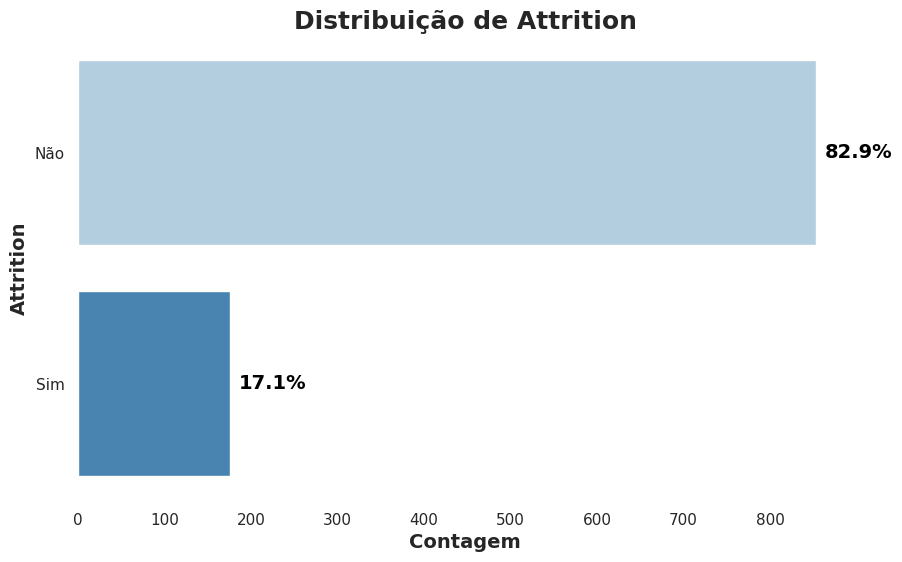

In [ ]:
# Gráfico de Barras Horizontais para a distribuição de 'Attrition'
plt.figure(figsize=(10, 6))
attrition_counts = df['Attrition'].value_counts()
ax = sns.barplot(x=attrition_counts.values, y=['Não', 'Sim'], palette='Blues')
total = len(df)
for i, v in enumerate(attrition_counts):
    percentage = f'{100 * v / total:.1f}%'
    ax.text(v + 10, i, percentage, color='black', va='center', fontsize=14, fontweight='bold')
plt.title("Distribuição de Attrition", fontsize=18, fontweight='bold')
plt.xlabel("Contagem", fontsize=14, fontweight='bold')
plt.ylabel("Attrition", fontsize=14, fontweight='bold')
sns.despine(left=True, bottom=True)
ax.grid(False)

plt.show()



Correlação entre variáveis numéricas:


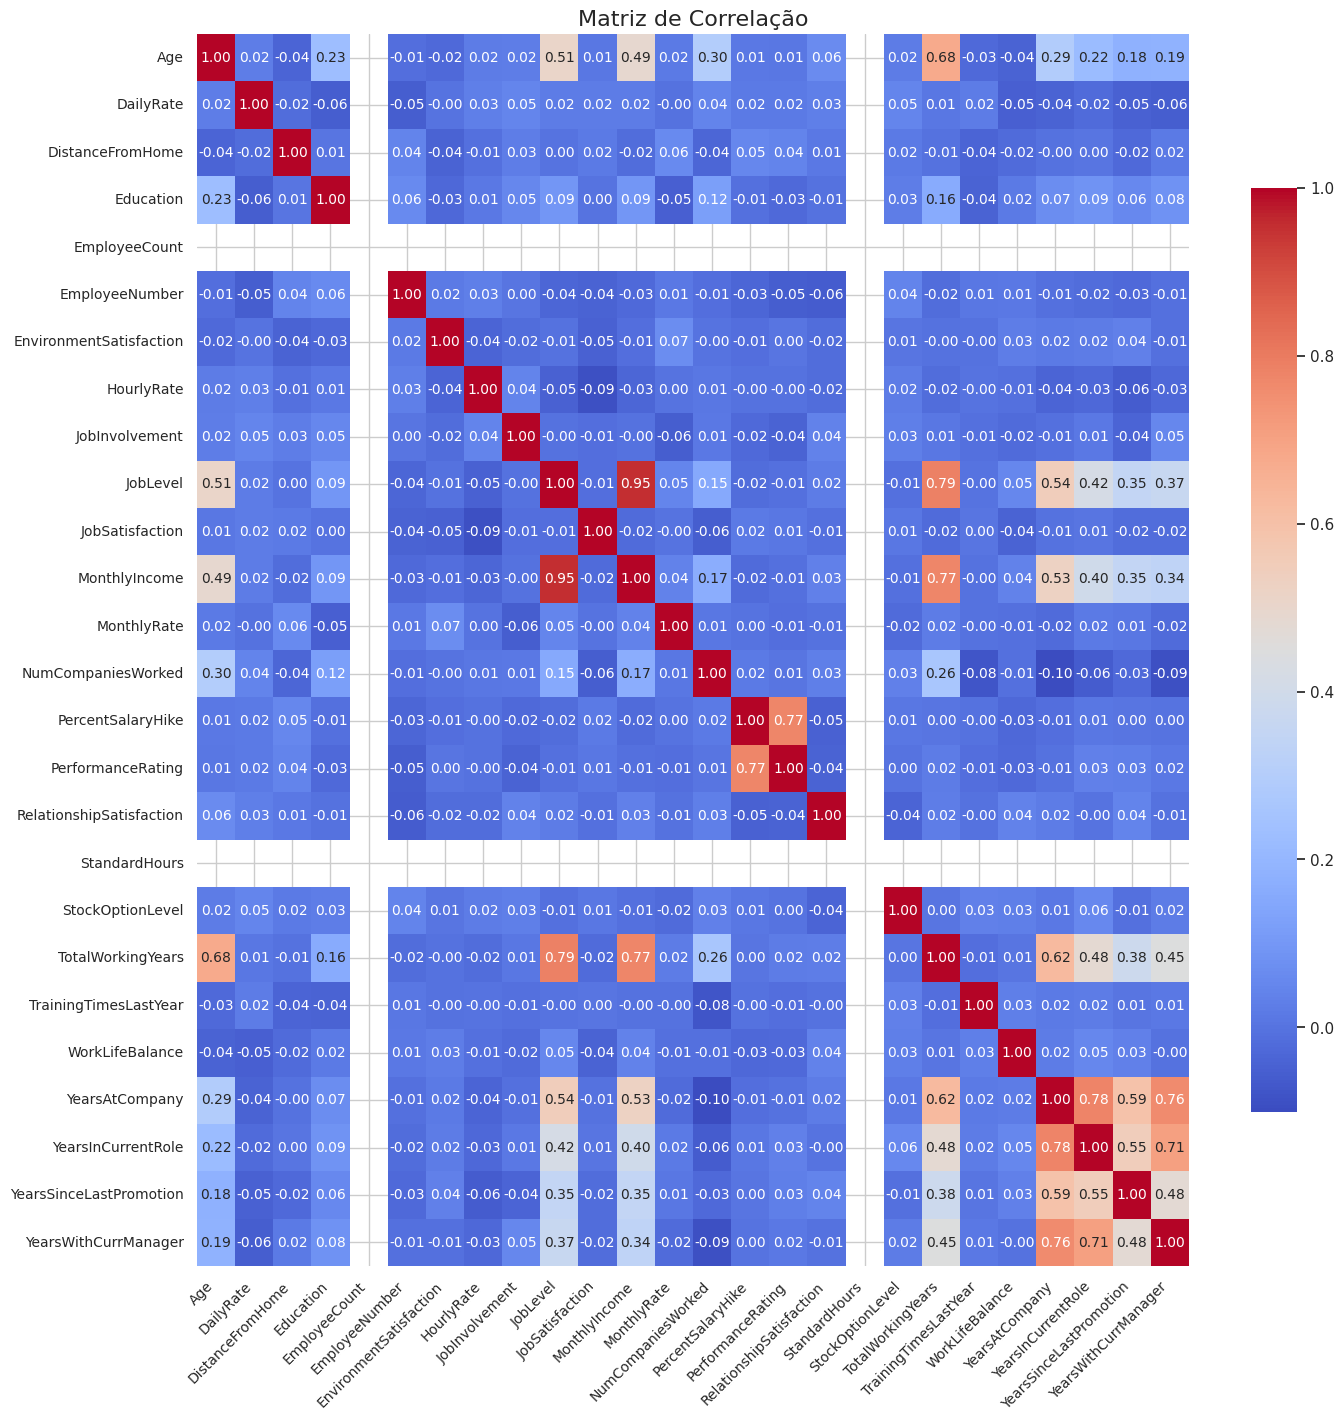

In [ ]:
# Análise da correlação entre variáveis numéricas
print("\nCorrelação entre variáveis numéricas:")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotando o heatmap de correlação
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()


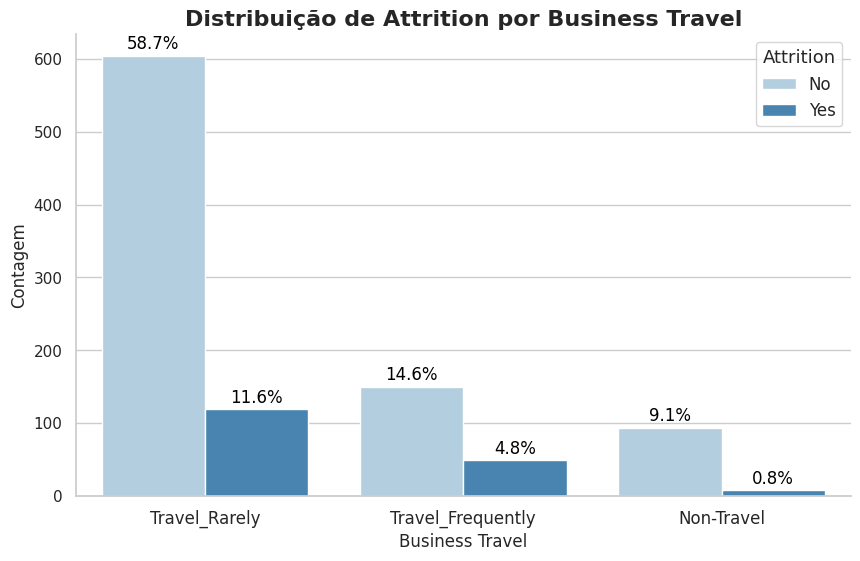

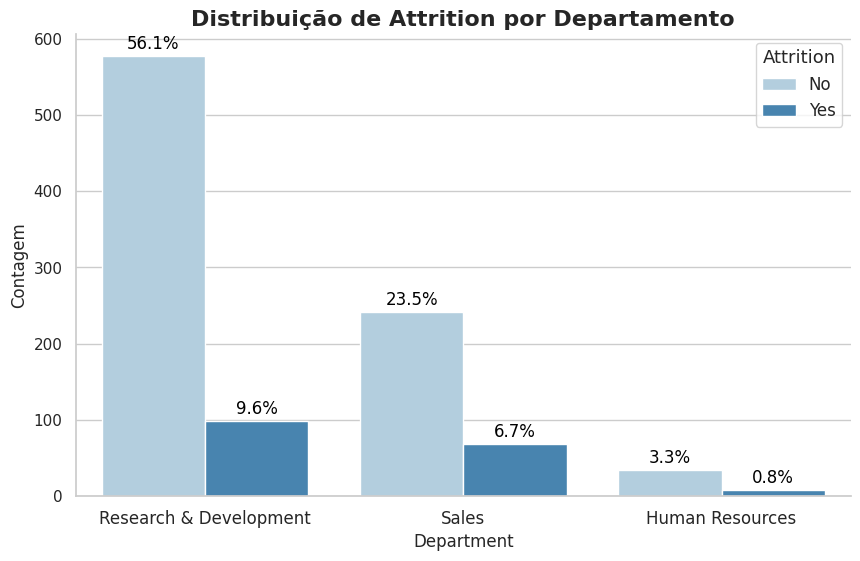

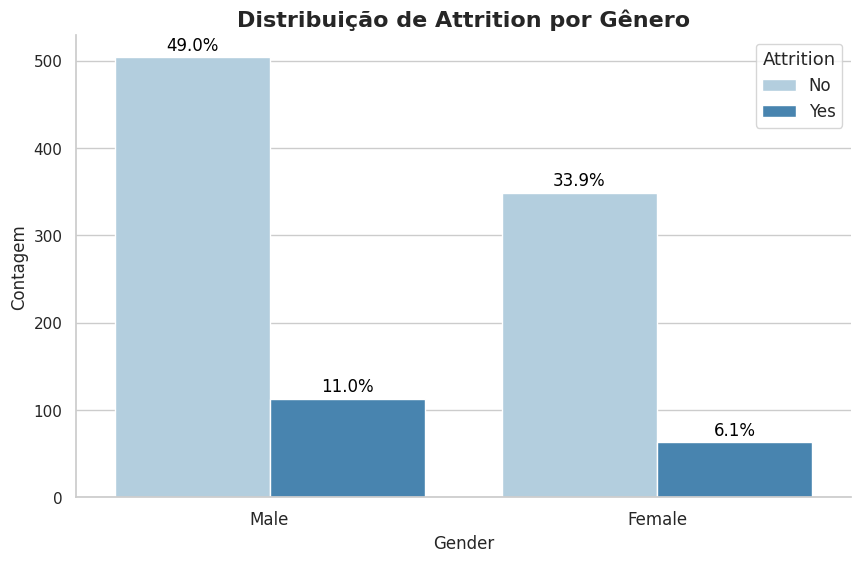

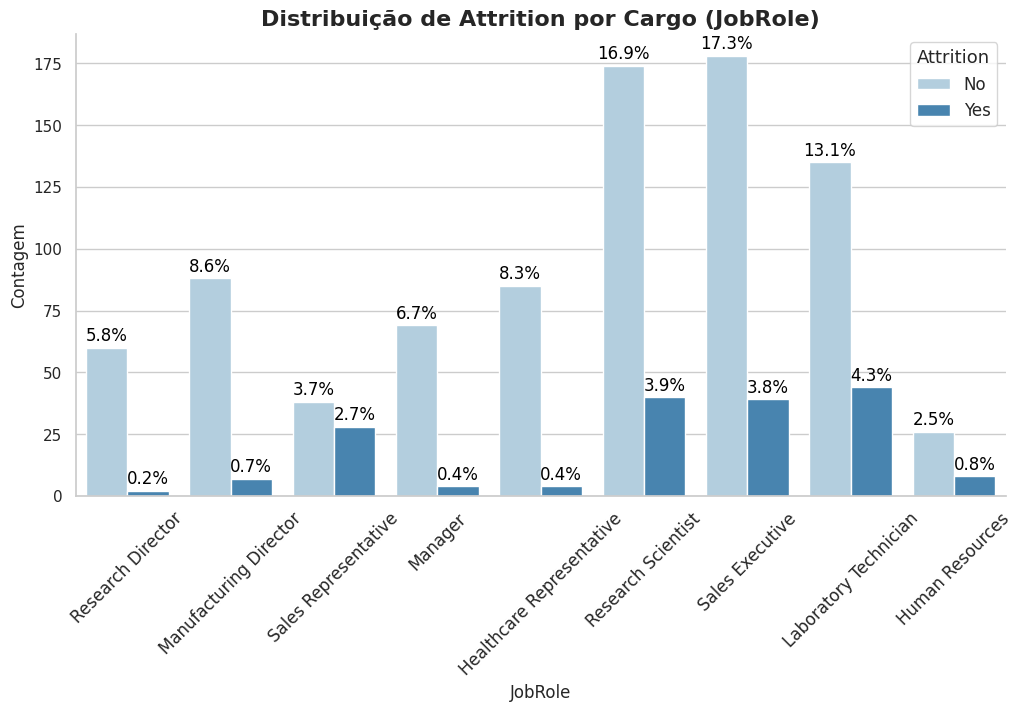

In [ ]:
# Função auxiliar
def add_percentages(ax, total):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=12, color='black',
                        xytext=(0, 5), textcoords='offset points')

# 1. Analisando 'Attrition' por 'BusinessTravel'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='Blues')
plt.title('Distribuição de Attrition por Business Travel', fontsize=16, fontweight='bold')
plt.xlabel('Business Travel', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
add_percentages(ax, len(df))
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Attrition", fontsize=12, title_fontsize='13')
sns.despine()
plt.show()

# 2. Analisando 'Attrition' por 'Department'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Department', hue='Attrition', palette='Blues')
plt.title('Distribuição de Attrition por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
add_percentages(ax, len(df))
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Attrition", fontsize=12, title_fontsize='13')
sns.despine()
plt.show()

# 3. Analisando 'Attrition' por 'Gender'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Attrition', palette='Blues')
plt.title('Distribuição de Attrition por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
add_percentages(ax, len(df))
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Attrition", fontsize=12, title_fontsize='13')
sns.despine()
plt.show()

# 4. Analisando 'Attrition' por 'JobRole'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Blues')
plt.title('Distribuição de Attrition por Cargo (JobRole)', fontsize=16, fontweight='bold')
plt.xlabel('JobRole', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
add_percentages(ax, len(df))
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Attrition", fontsize=12, title_fontsize='13')
sns.despine()
plt.show()



Distribuição de variáveis numéricas importantes:


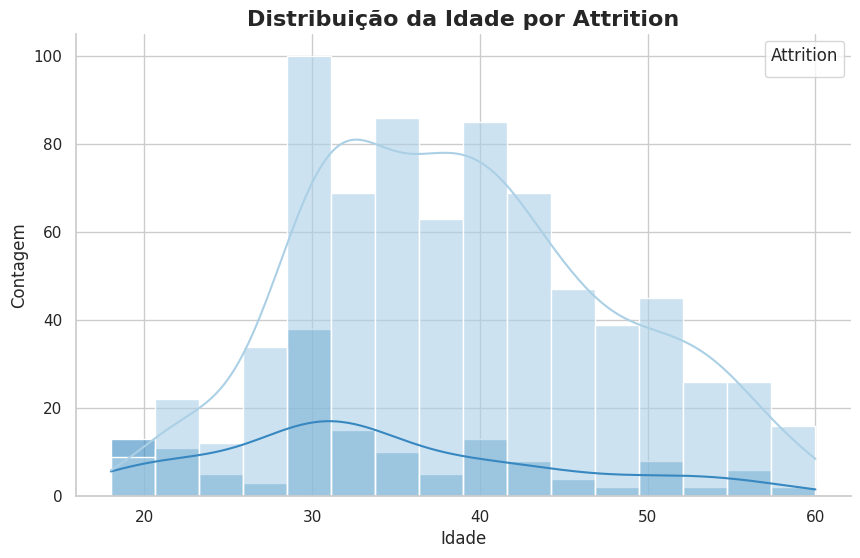

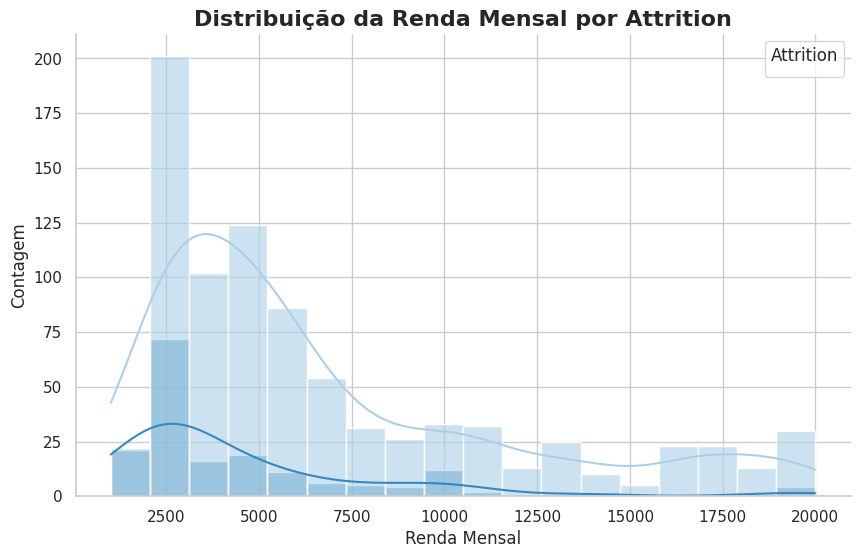

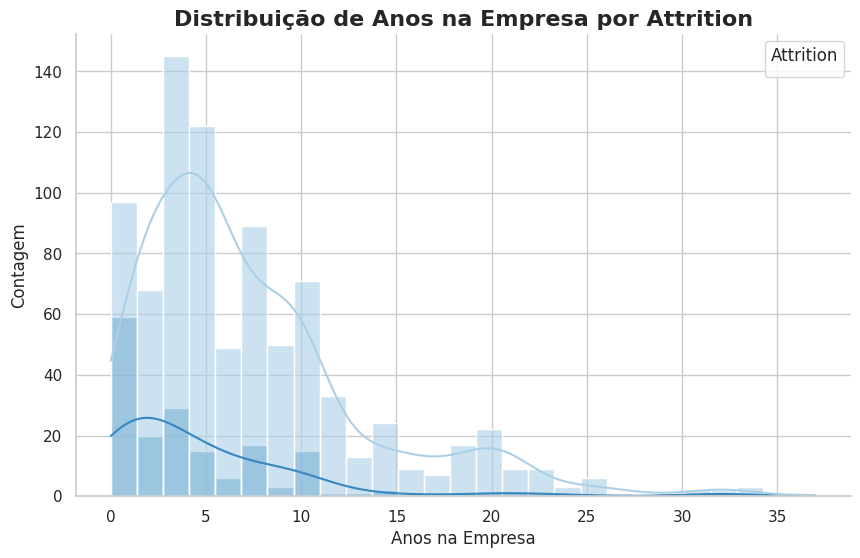

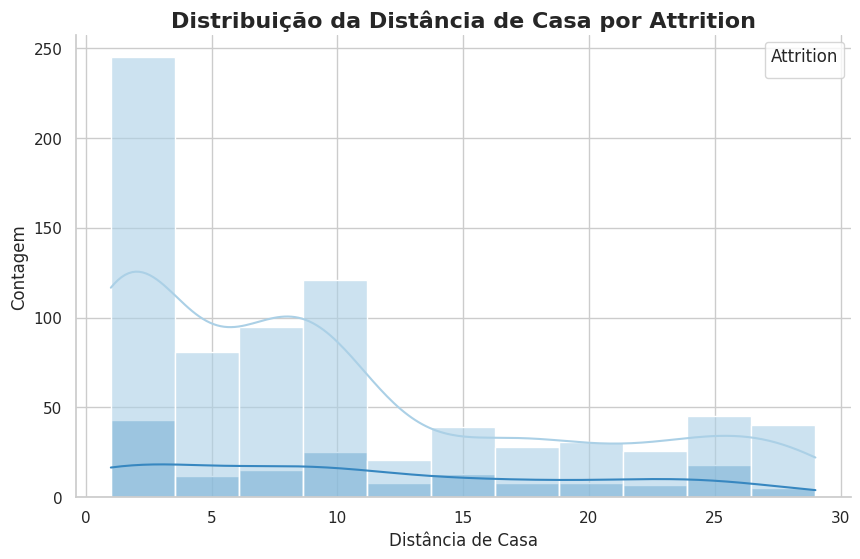

In [ ]:
# Analisando a distribuição de algumas variáveis numéricas importantes
print("\nDistribuição de variáveis numéricas importantes:")

# Configuração de uma paleta de cores mais suave
palette = 'Blues'

# 1. Idade (Age)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, palette=palette, edgecolor=None, alpha=0.6)
plt.title('Distribuição da Idade por Attrition', fontsize=16, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Attrition', title_fontsize=12, fontsize=10)
sns.despine()
plt.show()

# 2. Renda Mensal (MonthlyIncome)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, palette=palette, edgecolor=None, alpha=0.6)
plt.title('Distribuição da Renda Mensal por Attrition', fontsize=16, fontweight='bold')
plt.xlabel('Renda Mensal', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Attrition', title_fontsize=12, fontsize=10)
sns.despine()
plt.show()

# 3. Anos na empresa (YearsAtCompany)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', kde=True, palette=palette, edgecolor=None, alpha=0.6)
plt.title('Distribuição de Anos na Empresa por Attrition', fontsize=16, fontweight='bold')
plt.xlabel('Anos na Empresa', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Attrition', title_fontsize=12, fontsize=10)
sns.despine()
plt.show()

# 4. Distância de Casa (DistanceFromHome)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', kde=True, palette=palette, edgecolor=None, alpha=0.6)
plt.title('Distribuição da Distância de Casa por Attrition', fontsize=16, fontweight='bold')
plt.xlabel('Distância de Casa', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Attrition', title_fontsize=12, fontsize=10)
sns.despine()
plt.show()


In [ ]:
# Verificando a proporção de rotatividade por gênero
print("\nProporção de rotatividade por gênero:")
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
display(attrition_by_gender)


Proporção de rotatividade por gênero:


Attrition,No,Yes
Gender,,
Female,0.847087,0.152913
Male,0.816856,0.183144


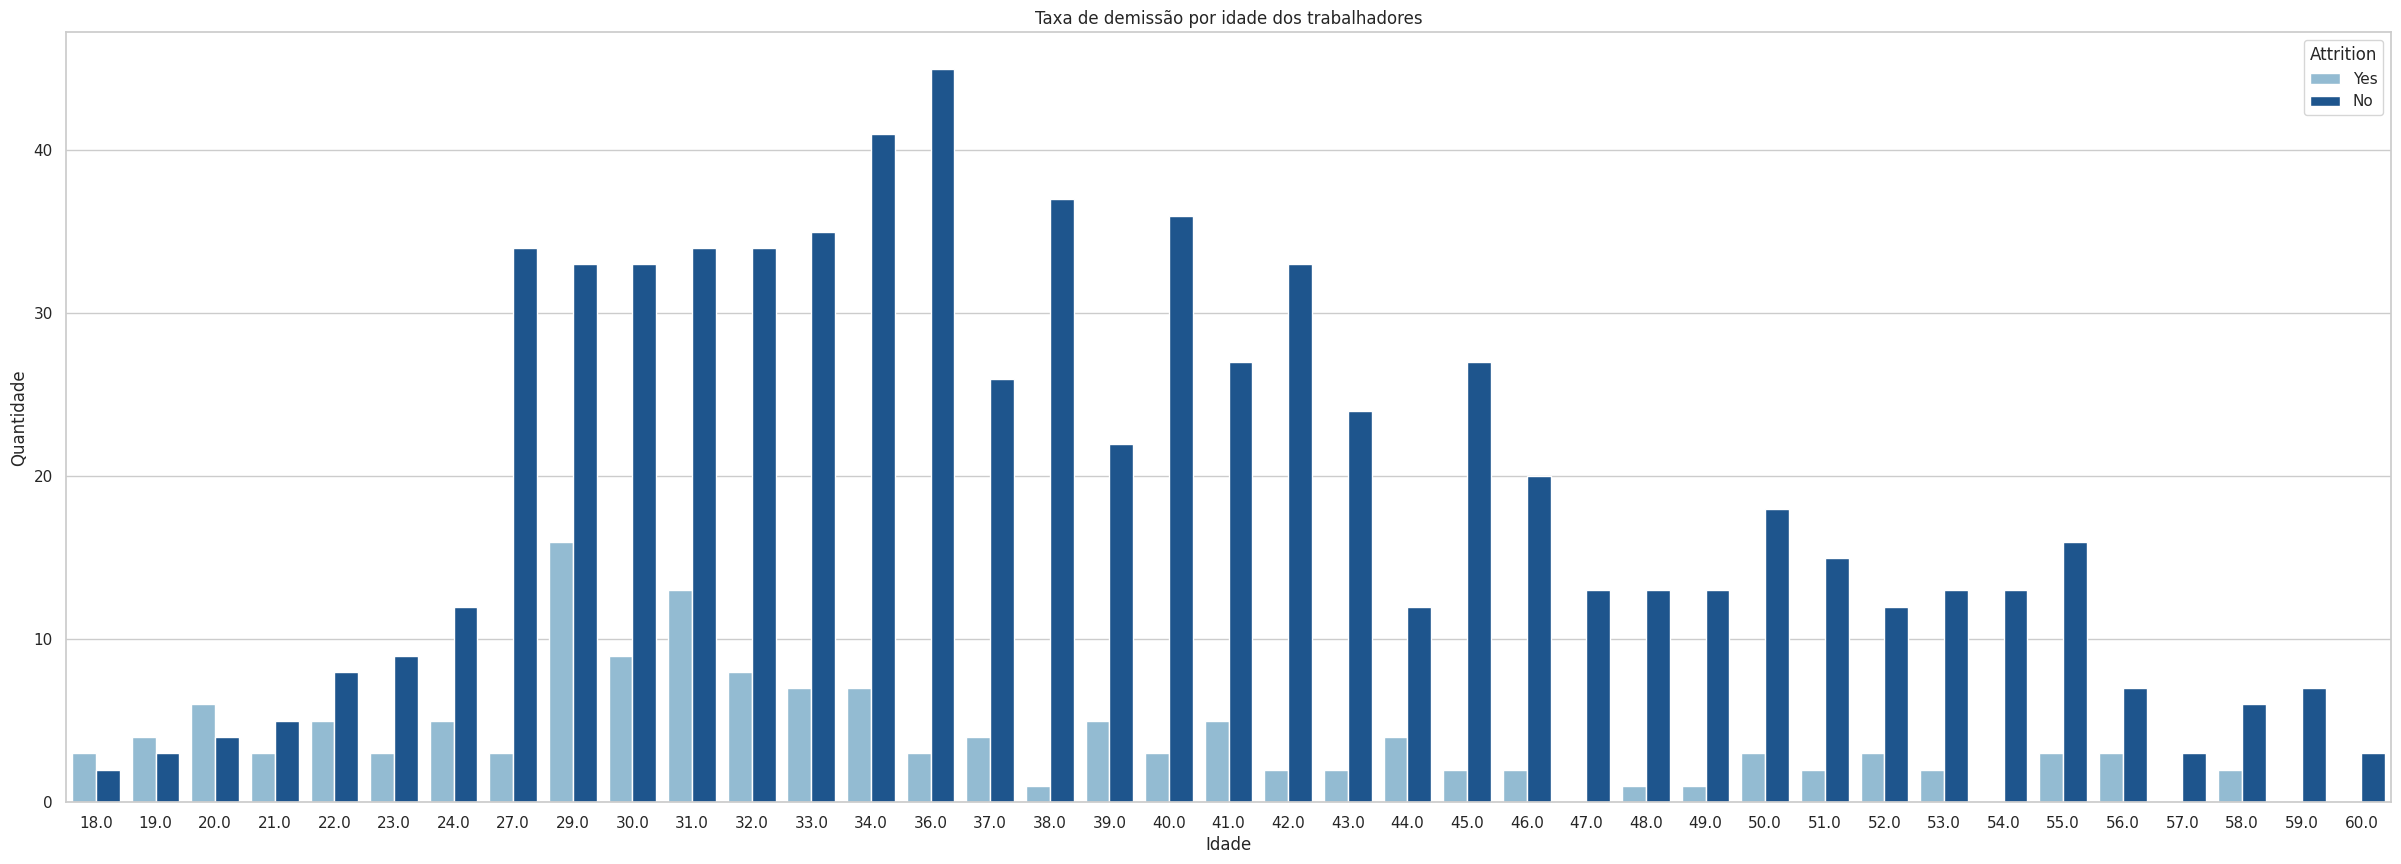

In [ ]:
# Attrition por idade
custom_blue_palette = sns.color_palette("Blues", 6)
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Age',
              hue='Attrition',
              palette=({'Yes': custom_blue_palette[2], 'No': custom_blue_palette[5]}))
plt.title('Taxa de demissão por idade dos trabalhadores')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

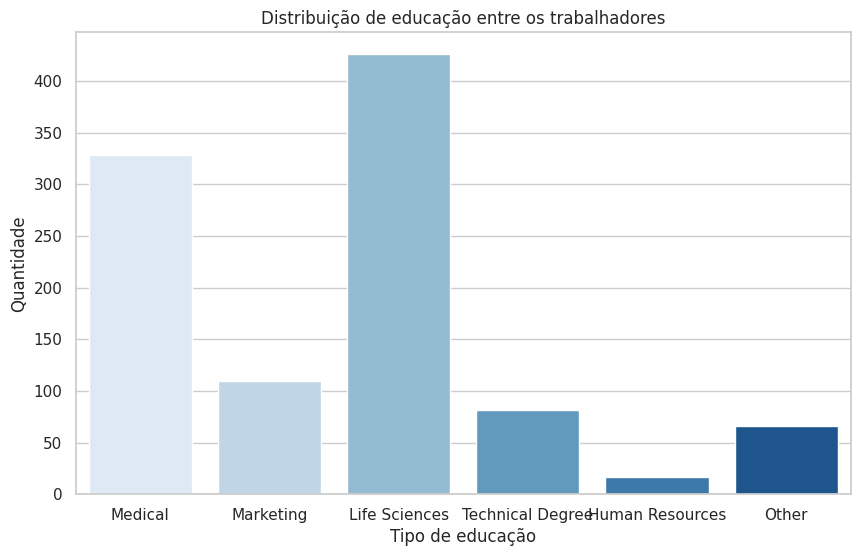

In [ ]:
# Distribuição dos trabalhadores em suas graduações
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EducationField', palette=custom_blue_palette)
plt.title('Distribuição de educação entre os trabalhadores')
plt.xlabel('Tipo de educação')
plt.ylabel('Quantidade')
plt.show()

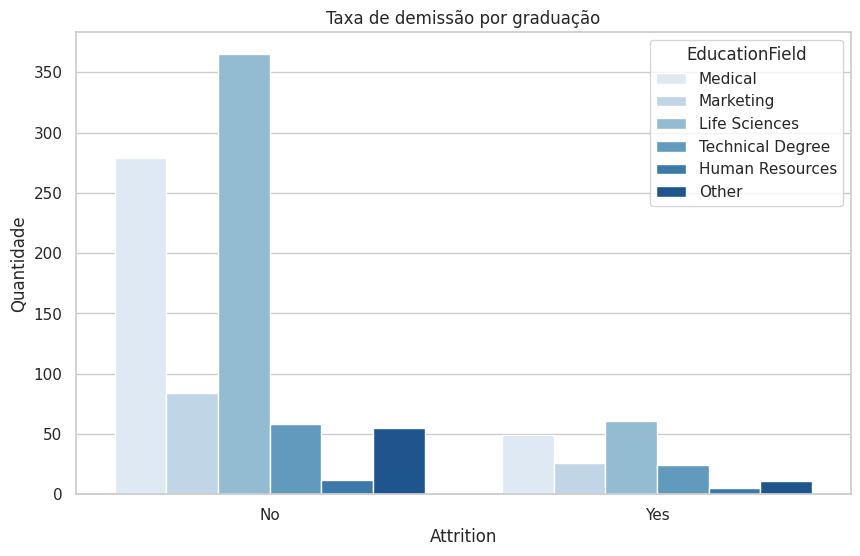

In [ ]:
# Attrition por educaçao
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition',
              hue='EducationField',
              palette=custom_blue_palette)
plt.title('Taxa de demissão por graduação')
plt.xlabel('Attrition')
plt.ylabel('Quantidade')
plt.show()

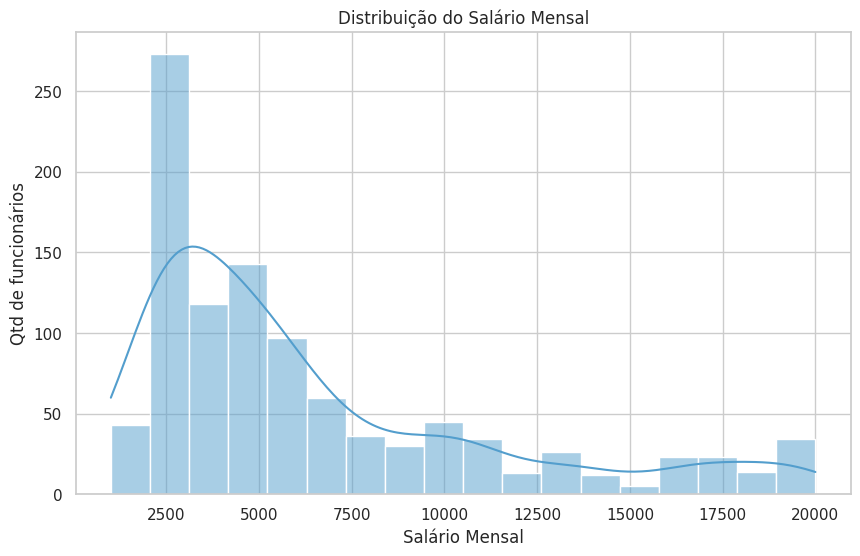

In [ ]:
# Distribuição dos salarios
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True,
color=custom_blue_palette[3])
plt.title('Distribuição do Salário Mensal')
plt.xlabel('Salário Mensal')
plt.ylabel('Qtd de funcionários')
plt.show()

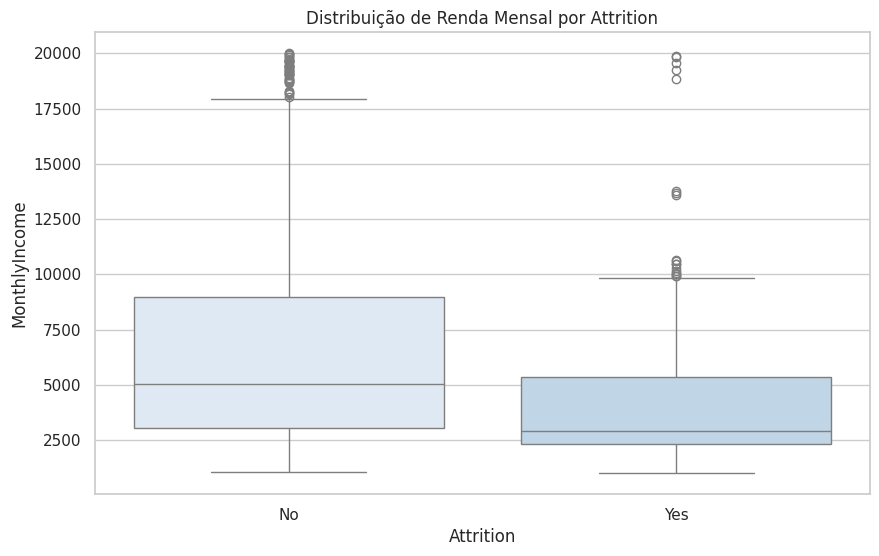

In [ ]:
# Distribuição dos salarios por Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome',
            data=df,
            palette=custom_blue_palette)
plt.title('Distribuição de Renda Mensal por Attrition')
plt.show()

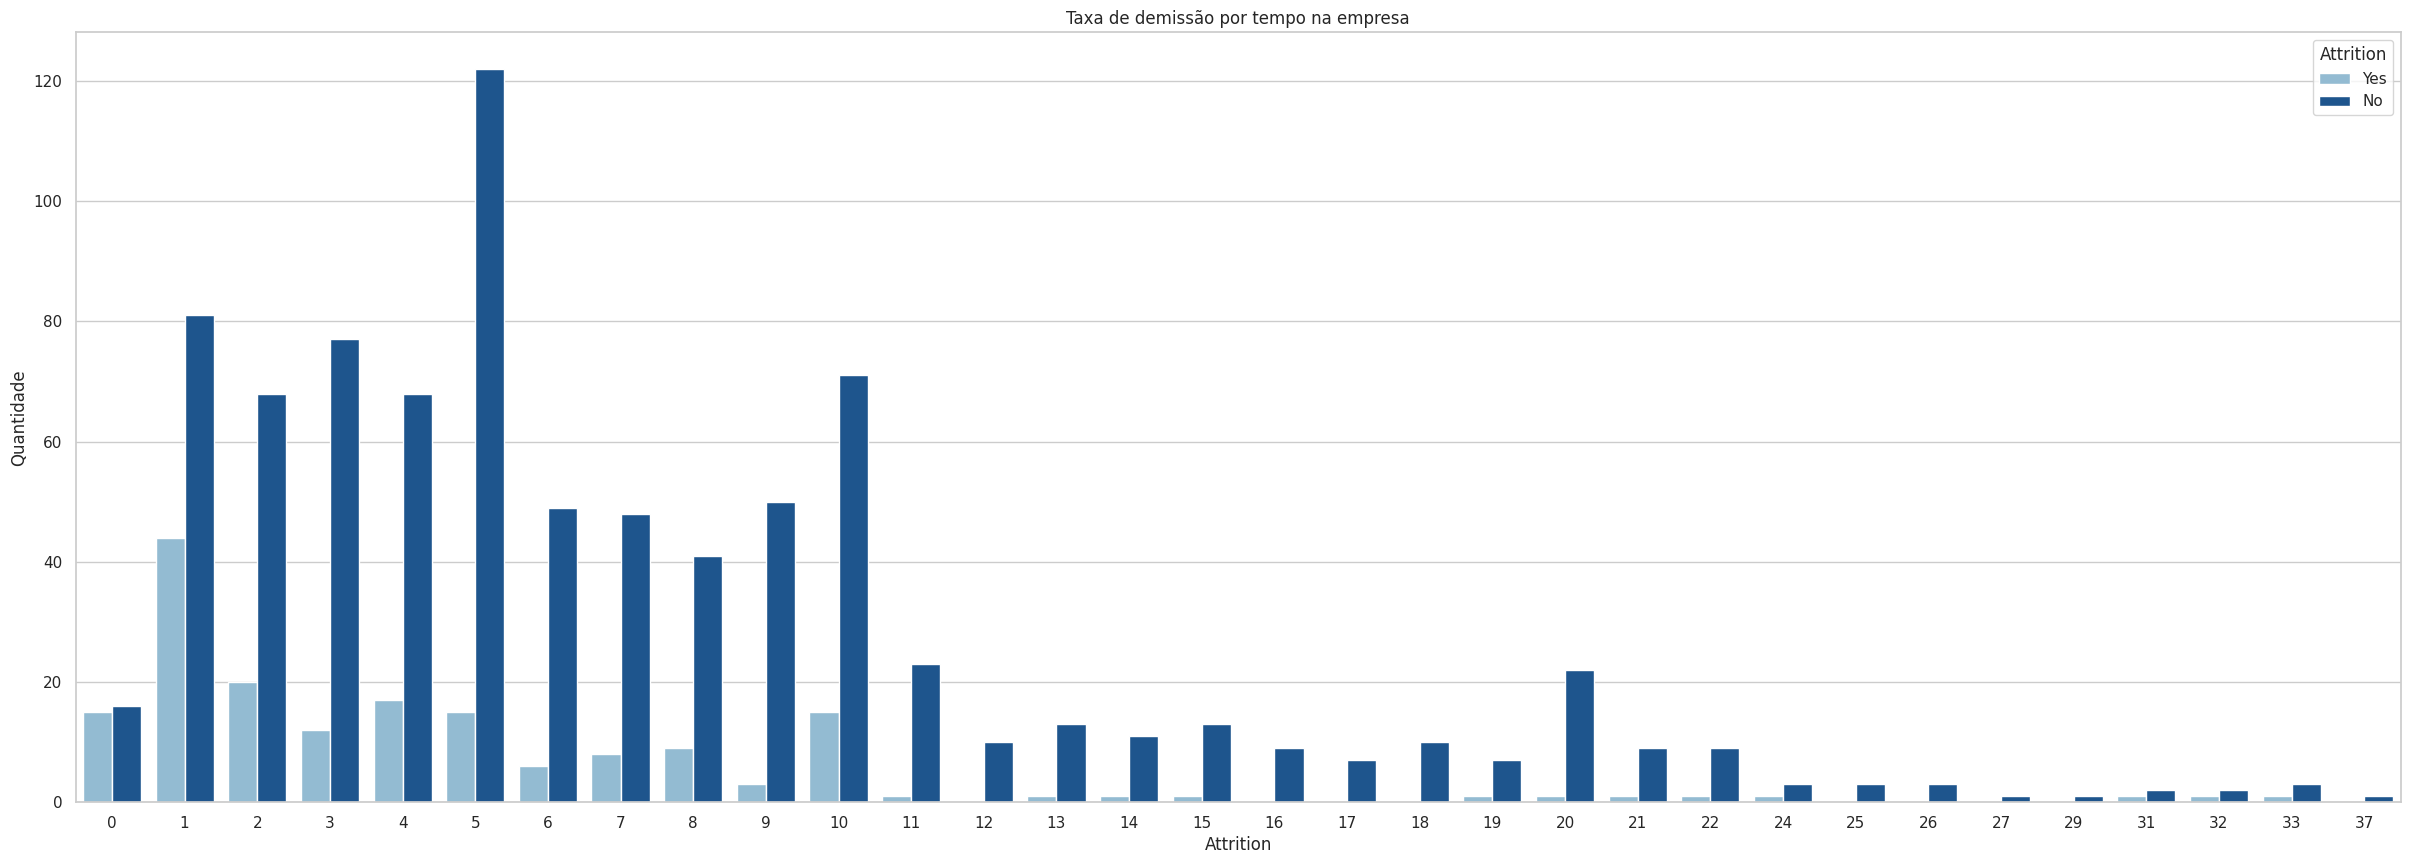

In [ ]:
# Attrition por "tempo de casa"
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='YearsAtCompany',
              hue='Attrition',
              palette=({'Yes':custom_blue_palette[2],'No':custom_blue_palette[5]}))
plt.title('Taxa de demissão por tempo na empresa')
plt.xlabel('Attrition')
plt.ylabel('Quantidade')
plt.show()

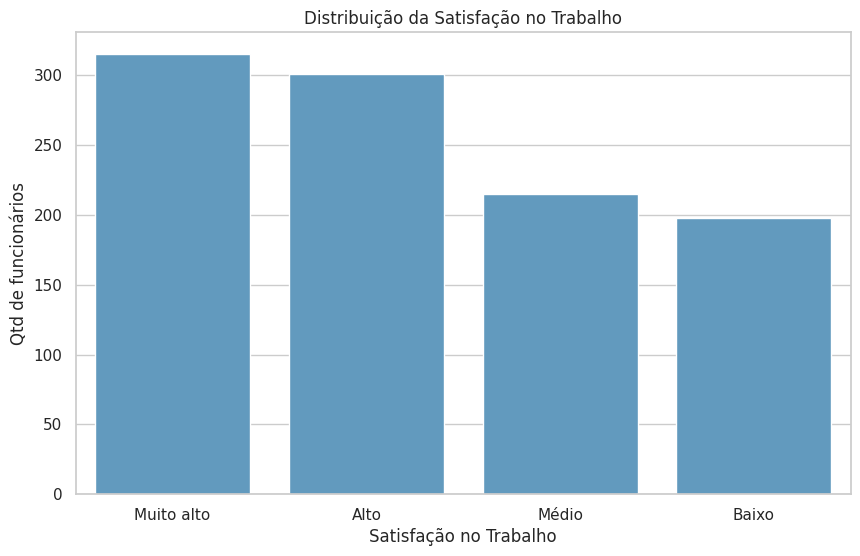

In [ ]:
# Satisfação no trabalho

job_satisfaction_texto = {1: 'Baixo', 2: 'Médio', 3: 'Alto', 4: 'Muito alto'}
df['JobSatisfactionTexto'] = df['JobSatisfaction'].map(job_satisfaction_texto)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSatisfactionTexto',
              order=df['JobSatisfactionTexto'].value_counts().index,
              palette=[custom_blue_palette[3]])
plt.title('Distribuição da Satisfação no Trabalho')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Qtd de funcionários')
plt.show()

df = df.drop(columns=['JobSatisfactionTexto'])


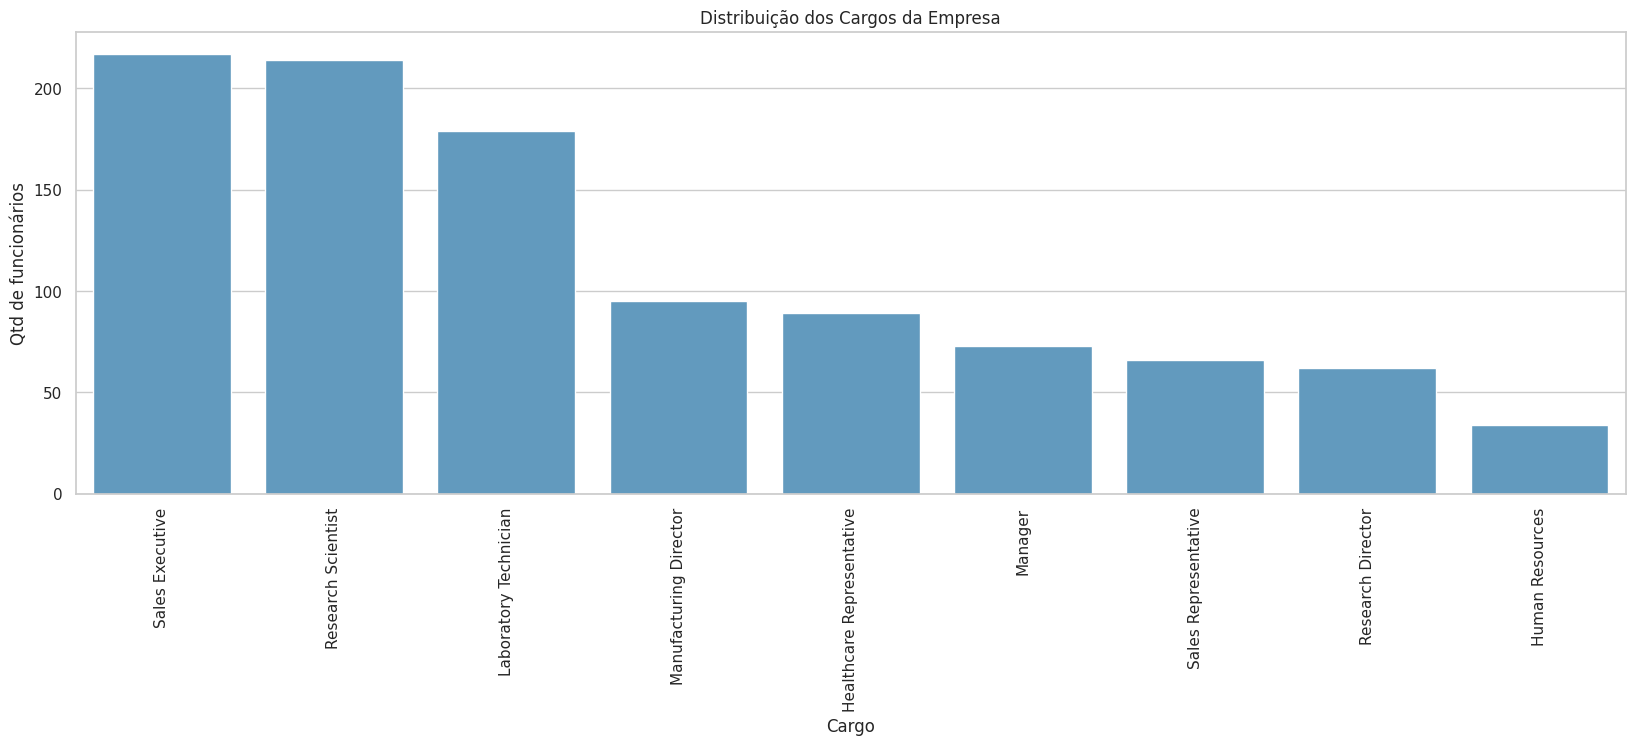

In [ ]:
# Countplot dos cargos da empresa
plt.figure(figsize=(20, 6))
sns.countplot(x='JobRole', data=df,
              order=df['JobRole'].value_counts().index,
              palette=[custom_blue_palette[3]])
plt.title('Distribuição dos Cargos da Empresa')
plt.xlabel('Cargo')
plt.ylabel('Qtd de funcionários')
plt.xticks(rotation=90)
plt.show()

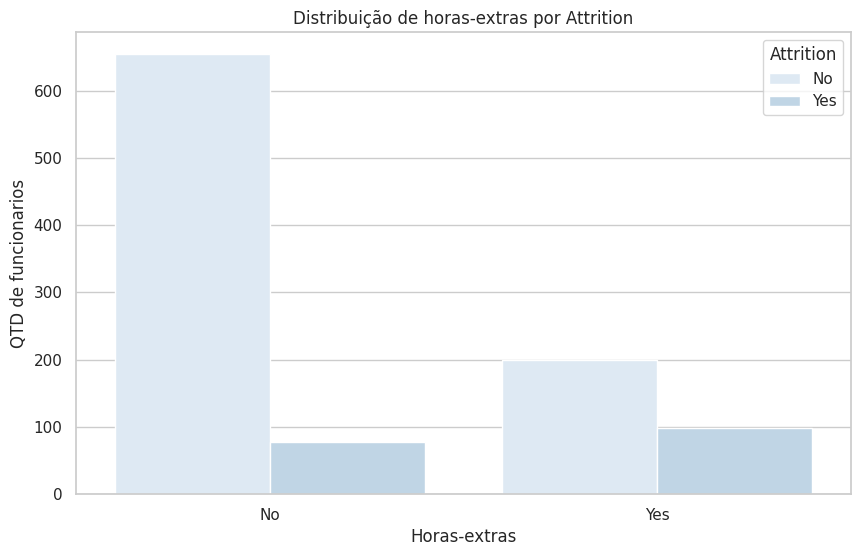

In [ ]:
# Countplot de horas-extras por Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette=(custom_blue_palette))
plt.title('Distribuição de horas-extras por Attrition')
plt.xlabel('Horas-extras')
plt.ylabel('QTD de funcionarios')
plt.show()

In [ ]:
# Comparando estatísticas descritivas
print("\nEstatísticas descritivas principais para 'Attrition' (0 = Fica, 1 = Sai):")
num_cols = df.select_dtypes(include=[np.number])
attrition_describe = df.groupby('Attrition')[num_cols.columns].describe()
selected_metrics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
attrition_describe_filtered = attrition_describe.loc[:, (slice(None), selected_metrics)]
attrition_describe_reordered = attrition_describe_filtered.stack()
attrition_describe_reordered = attrition_describe_reordered.sort_index(axis=1)
display(attrition_describe_reordered)


Estatísticas descritivas principais para 'Attrition' (0 = Fica, 1 = Sai):


Age    DailyRate  DistanceFromHome  Education  \
Attrition                                                             
No        mean  38.656417   806.886610          9.678756   2.902696   
          std    9.065927   409.791633          8.394638   1.058680   
          min   18.000000   102.000000          1.000000   1.000000   
          25%   32.000000   468.000000          2.000000   2.000000   
          50%   38.000000   809.000000          8.000000   3.000000   
          75%   45.000000  1176.000000         15.000000   4.000000   
          max   60.000000  1495.000000         29.000000   5.000000   
Yes       mean  34.186207   770.063584         11.129630   2.840909   
          std   10.180991   399.714624          8.473663   1.029689   
          min   18.000000   103.000000          1.000000   1.000000   
          25%   29.000000   419.000000          2.000000   2.000000   
          50%   32.000000   725.000000          9.000000   3.000000   
          75%   41.000000  1097.000000         18.000000   4.000000   
          max   58.000000  1496.000000         29.000000   5.000000   

                EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Attrition                                                                
No        mean            1.0     1019.839390                 2.724502   
          std             0.0      608.779065                 1.081350   
          min             1.0        2.000000                 1.000000   
          25%             1.0      482.000000                 2.000000   
          50%             1.0     1011.000000                 3.000000   
          75%             1.0     1558.000000                 4.000000   
          max             1.0     2068.000000                 4.000000   
Yes       mean            1.0     1046.312500                 2.482955   
          std             0.0      595.367305                 1.151270   
          min             1.0        1.000000                 1.000000   
          25%             1.0      577.750000                 1.000000   
          50%             1.0     1065.000000                 3.000000   
          75%             1.0     1525.000000                 3.250000   
          max             1.0     2044.000000                 4.000000   

                HourlyRate  JobInvolvement  JobLevel  ...  \
Attrition                                             ...   
No        mean   66.750293        2.754982  2.135991  ...   
          std    20.602709        0.693524  1.130159  ...   
          min    30.000000        1.000000  1.000000  ...   
          25%    48.000000        2.000000  1.000000  ...   
          50%    67.000000        3.000000  2.000000  ...   
          75%    85.000000        3.000000  3.000000  ...   
          max   100.000000        4.000000  5.000000  ...   
Yes       mean   66.340909        2.511364  1.596591  ...   
          std    19.892791        0.755843  0.945238  ...   
          min    31.000000        1.000000  1.000000  ...   
          25%    50.000000        2.000000  1.000000  ...   
          50%    67.000000        3.000000  1.000000  ...   
          75%    84.000000        3.000000  2.000000  ...   
          max   100.000000        4.000000  5.000000  ...   

                RelationshipSatisfaction  StandardHours  StockOptionLevel  \
Attrition                                                                   
No        mean                  2.708089           80.0          0.885111   
          std                   1.071567            0.0          0.859045   
          min                   1.000000           80.0          0.000000   
          25%                   2.000000           80.0          0.000000   
          50%                   3.000000           80.0          1.000000   
          75%                   4.000000           80.0          1.000000   
          max                   4.000000           80.0          3.000000   
Yes       mean                

## Comentarios:
**1. Análise Exploratória**

- **Distribuição de Attrition**:
  - A maioria dos funcionários não saíram da empresa.

- **Taxa de Attrition por Gênero**:
  - A maioria dos funcionários são homens.
  - Homens são a maioria entre os que deixam a empresa.

- **Distribuição da Idade dos Funcionários**:
  - A maioria dos funcionários está na faixa dos 30-40 anos.

- **Attrition por Idade**:
  - Funcionários mais jovens tendem a ter uma taxa de Attrition mais alta. Conforme a idade aumenta, a taxa de Attrition diminui.

- **Distribuição por Educação**:
  - A maioria dos funcionários possui formação em Life Sciences, seguido por Medical e Marketing.

- **Attrition por Educação**:
  - O Attrition ocorre em todas as áreas de educação, com uma distribuição relativamente uniforme.

- **Distribuição dos Salários**:
  - A maioria dos funcionários tem salários mensais entre 2000,00 e 5000,00.

- **Attrition por Salários**:
  - Funcionários que saem da empresa tendem a ter salários ligeiramente mais baixos.

- **Satisfação no Trabalho**:
  - A maioria dos funcionários tem uma satisfação no trabalho entre "Médio" e "Muito alto".

- **Distribuição dos Cargos da Empresa**:
  - Diversidade nos cargos ocupados pelos funcionários, com maior quantidade em "Sales Executive".

- **Distribuição de Horas-Extras por Attrition**:
  - A maioria dos funcionários que fazem horas-extras tendem a sair da empresa.

**2. Matriz de Correlação**

A matriz de correlação mostra as relações entre variáveis numéricas. Algumas observações importantes:

- **Relações positivas**:
  - `JobLevel` e `MonthlyIncome`: Cargos mais altos têm salários significativamente mais altos.
  - `TotalWorkingYears` e `YearsAtCompany`: Funcionários com mais anos de trabalho tendem a ter passado a maior parte desse tempo na empresa.
  - `PerformanceRating` e `PercentSalaryHike`: Avaliações de desempenho mais altas resultam em maiores aumentos salariais.
  - `YearsWithCurrManager` e `YearsAtCompany`: Funcionários que permanecem na empresa por um longo tempo tendem a trabalhar com o mesmo gerente por períodos prolongados.
  - `YearsInCurrentRole` e `YearsAtCompany`: A duração no cargo atual aumenta com o tempo total na empresa.
  - `YearsSinceLastPromotion` e `YearsAtCompany`: Funcionários que estão há mais tempo na empresa tendem a ter tido promoções há mais tempo.
  - `YearsInCurrentRole` e `YearsWithCurrManager`: Funcionários frequentemente permanecem no mesmo cargo enquanto trabalham com o mesmo gerente.
  - `Age` e `TotalWorkingYears`: Funcionários mais velhos geralmente têm mais anos de experiência.


- **Relações negativas**:
  - `DistanceFromHome` e `JobSatisfaction`: A distância de casa para o trabalho não tem praticamente nenhuma relação com a satisfação no trabalho.
  - `DailyRate` e `YearsAtCompany`: O salário diário não está relacionado ao tempo que o funcionário está na empresa.
  - `EnvironmentSatisfaction` e `NumCompaniesWorked`: A satisfação com o ambiente de trabalho tem pouca relação com o número de empresas onde o funcionário trabalhou anteriormente.
  - `JobInvolvement` e `YearsSinceLastPromotion`: O envolvimento no trabalho tem uma correlação muito baixa com os anos desde a última promoção.
  - `JobSatisfaction` e `StockOptionLevel`: A satisfação no trabalho não está significativamente relacionada ao nível de opções de ações.
  - `MonthlyRate` e `TotalWorkingYears`: O salário mensal não tem uma relação forte com o total de anos trabalhados.
  - `PercentSalaryHike` e `YearsAtCompany`: O aumento percentual do salário não está fortemente relacionado ao tempo na empresa.
  - `PerformanceRating` e `Age`: A avaliação de desempenho tem uma correlação muito baixa com a idade do funcionário.

**Comentários Gerais**

- As análises mostram uma relação entre horas-extras e a decisão de deixar a empresa, sugerindo um possível desgaste dos funcionários que realizam horas-extras frequentemente.
- A satisfação no trabalho é um fator crucial para a retenção de funcionários.
- A distribuição salarial e a progressão de carreira também são fatores importantes para a satisfação e retenção dos funcionários.

Essas observações podem ajudar na elaboração de estratégias para melhorar a retenção de talentos e aumentar a satisfação dos funcionários na empresa.

## Feature Engineering

In [ ]:
# Tratando valores ausentes

# Imputação de valores ausentes para variáveis numéricas com a mediana
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']])
df['DailyRate'] = num_imputer.fit_transform(df[['DailyRate']])
df['DistanceFromHome'] = num_imputer.fit_transform(df[['DistanceFromHome']])

# Substitui a string 'nan' por np.nan para garantir o correto tratamento
df['BusinessTravel'] = df['BusinessTravel'].replace('nan', np.nan)
df['MaritalStatus'] = df['MaritalStatus'].replace('nan', np.nan)

# Imputação de valores ausentes para variáveis categóricas com o valor mais frequente usando fillna
df['BusinessTravel'] = df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

# Verifica se todos os valores ausentes foram tratados
print("Valores ausentes restantes:", df.isnull().sum().sum())  # Deve retornar 0 se todos os valores ausentes foram corrigidos


Valores ausentes restantes: 0


In [ ]:
# Identifica as colunas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Exclui a variável-alvo 'Attrition' para não codificá-la
cat_cols = cat_cols.drop('Attrition')

# Aplica One-Hot Encoding para variáveis categóricas não-ordenadas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Aplica Label Encoding para a variável-alvo 'Attrition'
label_enc = LabelEncoder()
df['Attrition'] = label_enc.fit_transform(df['Attrition'])

# Exibe as primeiras linhas após a codificação
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,50.0,0,1126.0,1.0,2,1,997,4,66,3,...,False,False,False,True,False,False,False,False,False,False
1,36.0,0,216.0,6.0,2,1,178,2,84,3,...,False,False,True,False,False,False,False,False,False,False
2,21.0,1,337.0,7.0,1,1,1780,2,31,3,...,False,False,False,False,False,False,True,False,True,False
3,50.0,0,1246.0,8.0,3,1,644,1,99,3,...,False,True,False,False,False,False,False,True,False,False
4,52.0,0,994.0,7.0,4,1,1118,2,87,3,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Identifica as colunas numéricas para escalonamento (excluindo a variável-alvo 'Attrition')
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition')

# Escalonamento com StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Divisão dos dados em treino e teste
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Exibe as dimensões dos conjuntos de treino e teste
X_train.shape, X_test.shape


((720, 47), (309, 47))

## Treinamento de modelos

### Random Forest


Relatório de Classificação - RandomForest

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       256
           1       0.87      0.25      0.38        53

    accuracy                           0.86       309
   macro avg       0.87      0.62      0.65       309
weighted avg       0.86      0.86      0.83       309

ROC AUC para o modelo RandomForest: 0.82


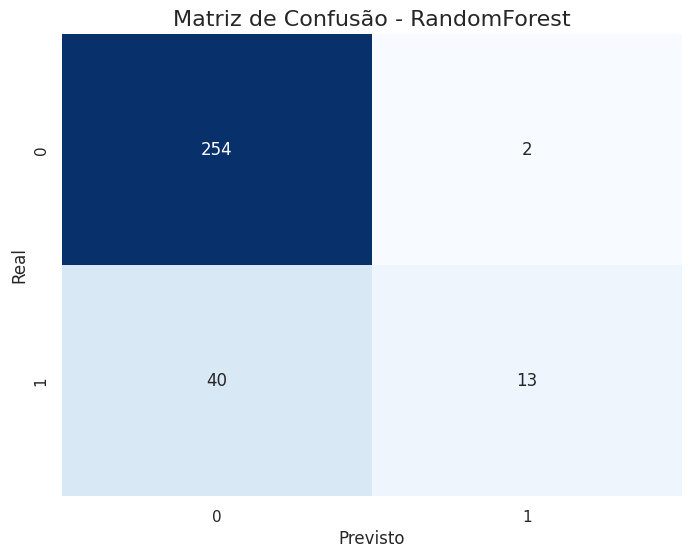

In [ ]:
# Criando a instância do modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Treinamento do modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Avaliação do modelo no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Relatório de classificação
rf_classification_report = classification_report(y_test, y_pred_rf)

# Matriz de confusão
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Cálculo do ROC AUC
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Exibe o relatório de classificação e o ROC AUC
print("\nRelatório de Classificação - RandomForest\n")
print(rf_classification_report)
print(f"ROC AUC para o modelo RandomForest: {rf_roc_auc:.2f}")

# Exibe a matriz de confusão em forma de gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RandomForest', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()


### Regressão Logistica


Relatório de Classificação - LogisticRegression

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       256
           1       0.83      0.47      0.60        53

    accuracy                           0.89       309
   macro avg       0.87      0.73      0.77       309
weighted avg       0.89      0.89      0.88       309

ROC AUC para o modelo LogisticRegression: 0.88


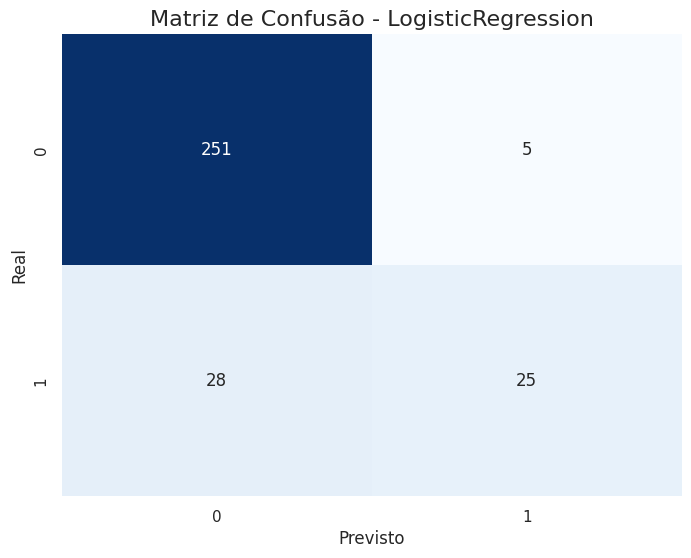

In [ ]:
# Criando a instância do modelo LogisticRegression
lr_model = LogisticRegression(random_state=42)

# Treinamento do modelo com os dados de treino
lr_model.fit(X_train, y_train)

# Avaliação do modelo no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# Relatório de classificação
lr_classification_report = classification_report(y_test, y_pred_lr)

# Matriz de confusão
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)

# Cálculo do ROC AUC
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Exibe o relatório de classificação e o ROC AUC
print("\nRelatório de Classificação - LogisticRegression\n")
print(lr_classification_report)
print(f"ROC AUC para o modelo LogisticRegression: {lr_roc_auc:.2f}")

# Exibe a matriz de confusão em forma de gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - LogisticRegression', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()


## Validação de modelos

In [ ]:
# Validação cruzada para RandomForest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média com validação cruzada para RandomForest: {rf_cv_scores.mean():.2f}")

# Validação cruzada para LogisticRegression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média com validação cruzada para LogisticRegression: {lr_cv_scores.mean():.2f}")


Acurácia média com validação cruzada para RandomForest: 0.84
Acurácia média com validação cruzada para LogisticRegression: 0.84


In [ ]:
# Validação cruzada com F1-Score para RandomForest
rf_f1_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"F1-Score médio com validação cruzada para RandomForest: {rf_f1_scores.mean():.2f}")

# Validação cruzada com F1-Score para LogisticRegression
lr_f1_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')
print(f"F1-Score médio com validação cruzada para LogisticRegression: {lr_f1_scores.mean():.2f}")


F1-Score médio com validação cruzada para RandomForest: 0.18
F1-Score médio com validação cruzada para LogisticRegression: 0.42


In [ ]:
# Validação cruzada com ROC AUC para RandomForest
rf_roc_auc_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"ROC AUC médio com validação cruzada para RandomForest: {rf_roc_auc_scores.mean():.2f}")

# Validação cruzada com ROC AUC para LogisticRegression
lr_roc_auc_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"ROC AUC médio com validação cruzada para LogisticRegression: {lr_roc_auc_scores.mean():.2f}")

ROC AUC médio com validação cruzada para RandomForest: 0.76
ROC AUC médio com validação cruzada para LogisticRegression: 0.81


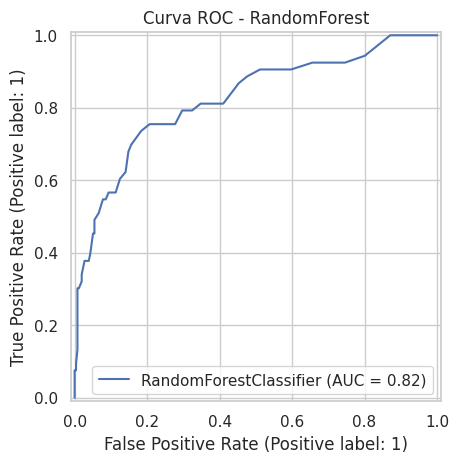

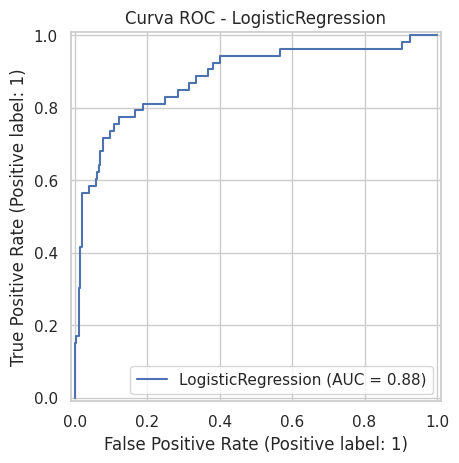

In [ ]:
# Curva ROC para RandomForest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - RandomForest")
plt.show()

# Curva ROC para LogisticRegression
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Curva ROC - LogisticRegression")
plt.show()

## Tuning de hiperparâmetros

### Random Forest

In [ ]:
# Definindo o grid de parâmetros para RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Criando a instância do modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Configurando o GridSearchCV para RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo nos dados de treino
grid_search_rf.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros:", grid_search_rf.best_params_)

# Reavaliar o modelo com os melhores parâmetros
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_classification_report = classification_report(y_test, y_pred_best_rf)
best_rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Exibir os resultados do tuning de RandomForest
print("\nRelatório de Classificação - RandomForest\n")
print(best_rf_classification_report)
print(f"ROC AUC para o modelo RandomForest: {best_rf_roc_auc:.2f}")


Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

Relatório de Classificação - RandomForest

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       256
           1       0.82      0.17      0.28        53

    accuracy                           0.85       309
   macro avg       0.84      0.58      0.60       309
weighted avg       0.85      0.85      0.81       309

ROC AUC para o modelo RandomForest: 0.84


### Regressão Logistica

In [ ]:
# Definir o grid de parâmetros para LogisticRegression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Testa diferentes valores de regularização
    'penalty': ['l1', 'l2'],  # Penalidades l1 (lasso) e l2 (ridge)
    'solver': ['liblinear', 'saga']  # Solvers compatíveis com l1 e l2
}

# Criando a instância do modelo de regressão logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Configurando o GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo nos dados de treino
grid_search_lr.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros:", grid_search_lr.best_params_)

# Reavaliar o modelo com os melhores parâmetros
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
best_lr_classification_report = classification_report(y_test, y_pred_best_lr)
best_lr_roc_auc = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

# Resultados do tuning da LogisticRegression
print(best_lr_classification_report)
print("ROC AUC:", best_lr_roc_auc)


Melhores parâmetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       256
           1       0.82      0.26      0.40        53

    accuracy                           0.86       309
   macro avg       0.84      0.63      0.66       309
weighted avg       0.86      0.86      0.83       309

ROC AUC: 0.8613649764150945


In [ ]:
# Usando o melhor modelo encontrado pelo GridSearch para RandomForest
best_rf_model = grid_search_rf.best_estimator_
best_rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Exibir a acurácia média da validação cruzada
print(f"Acurácia média com validação cruzada para o modelo ajustado de RandomForest: {best_rf_cv_scores.mean():.2f}")

# Usando o melhor modelo encontrado pelo GridSearch para LogisticRegression
best_lr_model = grid_search_lr.best_estimator_
best_lr_cv_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Exibir a acurácia média da validação cruzada
print(f"Acurácia média com validação cruzada para o modelo ajustado de LogisticRegression: {best_lr_cv_scores.mean():.2f}")

Acurácia média com validação cruzada para o modelo ajustado de RandomForest: 0.85
Acurácia média com validação cruzada para o modelo ajustado de LogisticRegression: 0.85


In [ ]:
# Usando o melhor modelo encontrado pelo GridSearch para RandomForest
best_rf_model = grid_search_rf.best_estimator_
best_rf_f1_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')

# Exibir o F1-Score médio da validação cruzada para RandomForest
print(f"F1-Score médio com validação cruzada para o modelo ajustado de RandomForest: {best_rf_f1_scores.mean():.2f}")

# Usando o melhor modelo encontrado pelo GridSearch para LogisticRegression
best_lr_model = grid_search_lr.best_estimator_
best_lr_f1_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='f1')

# Exibir o F1-Score médio da validação cruzada para LogisticRegression
print(f"F1-Score médio com validação cruzada para o modelo ajustado de LogisticRegression: {best_lr_f1_scores.mean():.2f}")


F1-Score médio com validação cruzada para o modelo ajustado de RandomForest: 0.24
F1-Score médio com validação cruzada para o modelo ajustado de LogisticRegression: 0.37


### Análise dos resultados dos modelos
Ao longo da análise, foram utilizados dois modelos principais para prever a variável Attrition: Random Forest e Regressão Logística. A seguir, destacamos as observações e conclusões sobre o desempenho de cada modelo.

1. Random Forest
O modelo de Random Forest foi treinado inicialmente com hiperparâmetros padrão e, em seguida, submetido a um ajuste de hiperparâmetros utilizando o GridSearchCV para melhorar o desempenho. Os hiperparâmetros ajustados, como o número de estimadores (n_estimators), profundidade máxima (max_depth) e o número mínimo de amostras para dividir um nó (min_samples_split), resultaram em um leve incremento de performance.

No entanto, mesmo com o ajuste de hiperparâmetros, o modelo Random Forest não conseguiu superar o desempenho da Regressão Logística em termos de métricas como o F1-Score e o ROC AUC, especialmente no tratamento de casos de funcionários que saem (classe minoritária).

2. Regressão Logística
A Regressão Logística, por outro lado, mostrou-se mais eficaz desde o início. Mesmo sem um tuning de hiperparâmetros significativo, o modelo apresentou uma melhor capacidade de generalização, obtendo um F1-Score superior e um ROC AUC mais alto quando comparado ao modelo de Random Forest. Isso sugere que a Regressão Logística foi capaz de lidar melhor com o balanceamento entre as classes e capturar de forma mais precisa os padrões de rotatividade dos funcionários.

Embora o ajuste de hiperparâmetros tenha sido realizado para a Regressão Logística, o impacto no desempenho não foi bom. O modelo já apresentava uma performance robusta antes do tuning, e o ajuste não resultou em um incremento  nos resultados, o que sugere que o modelo já estava bem ajustado aos dados.

Conclusão
Com base nas métricas avaliadas (como acurácia, F1-Score e ROC AUC), o modelo de Regressão Logística apresentou resultados mais consistentes e superiores ao Random Forest. Mesmo com o tuning de hiperparâmetros, o Random Forest não conseguiu igualar o desempenho da Regressão Logística, reforçando a eficiência deste modelo para o problema em questão.

Assim, a Regressão Logística é recomendada como o modelo final para prever a rotatividade de funcionários, dada sua performance geral e simplicidade em termos de interpretação.